In [1]:
import numpy as np
import matplotlib.pyplot as plt
from planes import RandomHyperplanes
from projections import RandomProjectionForest
from iforest import IsolationForest

In [2]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [3]:
def run(model, name):    
    # fit the model
    try:
        clf = model(n_estimators=100, max_depth=1000)
        clf = clf.fit(X_train)
        xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
        Z = 1 - clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        
    except:
        clf = model(n_estimators=100)
        clf = clf.fit(X_train)
        xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    # y_pred_train = clf.predict(X_train)
    # y_pred_test = clf.predict(X_test)
    # y_pred_outliers = clf.predict(X_outliers)
    
    # plot the line, the samples, and the nearest vectors to the plane
    Z = Z.reshape(xx.shape)
    plt.title(name)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

    b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
    b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
    c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
    plt.axis('tight')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.legend([b1, b2, c],
               ["training observations",
                "new regular observations", "new abnormal observations"],
               loc="upper left")
    plt.show()
    return Z

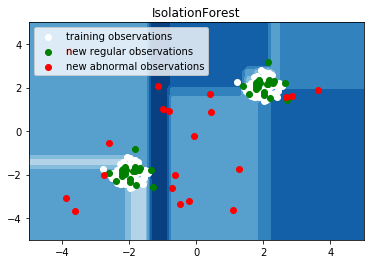

array([[ 0.31244282,  0.31244282,  0.31244282, ...,  0.20874218,
         0.20874218,  0.20874218],
       [ 0.31244282,  0.31244282,  0.31244282, ...,  0.20874218,
         0.20874218,  0.20874218],
       [ 0.31244282,  0.31244282,  0.31244282, ...,  0.20874218,
         0.20874218,  0.20874218],
       ..., 
       [ 0.3438964 ,  0.3438964 ,  0.3438964 , ...,  0.27948137,
         0.27948137,  0.27948137],
       [ 0.3438964 ,  0.3438964 ,  0.3438964 , ...,  0.27948137,
         0.27948137,  0.27948137],
       [ 0.3438964 ,  0.3438964 ,  0.3438964 , ...,  0.27948137,
         0.27948137,  0.27948137]])

In [4]:
run(IsolationForest, "IsolationForest")

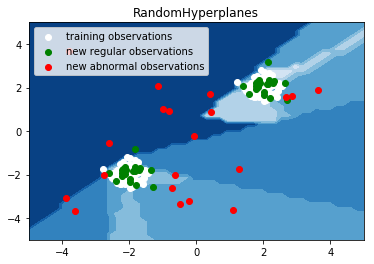

array([[ 0.24493974,  0.24493974,  0.24493974, ...,  0.31244282,
         0.31244282,  0.31244282],
       [ 0.24493974,  0.24493974,  0.24493974, ...,  0.31244282,
         0.31244282,  0.31244282],
       [ 0.24493974,  0.24493974,  0.24493974, ...,  0.31244282,
         0.31244282,  0.31244282],
       ..., 
       [ 0.17080932,  0.17080932,  0.17080932, ...,  0.3438964 ,
         0.3438964 ,  0.429884  ],
       [ 0.17080932,  0.17080932,  0.17080932, ...,  0.3438964 ,
         0.3438964 ,  0.3438964 ],
       [ 0.17080932,  0.17080932,  0.17080932, ...,  0.3438964 ,
         0.3438964 ,  0.3438964 ]])

In [5]:
run(RandomHyperplanes, "RandomHyperplanes")

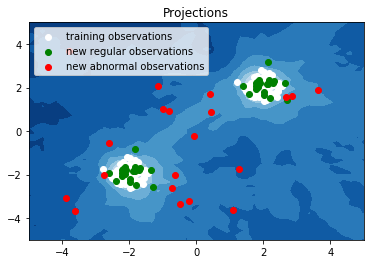

array([[ 0.49943413,  0.49943627,  0.49943532, ...,  0.49944578,
         0.49945213,  0.49944832],
       [ 0.49942817,  0.49943391,  0.49943649, ...,  0.49945351,
         0.49945357,  0.49945171],
       [ 0.49942629,  0.49942923,  0.49943357, ...,  0.49945807,
         0.4994532 ,  0.49945137],
       ..., 
       [ 0.49942233,  0.4994214 ,  0.49942675, ...,  0.49943792,
         0.49943979,  0.49944126],
       [ 0.49941845,  0.49941883,  0.49942177, ...,  0.49944818,
         0.4994363 ,  0.49943826],
       [ 0.49941486,  0.49940959,  0.49941379, ...,  0.49944613,
         0.49944271,  0.49943566]])

In [6]:
run(RandomProjectionForest, "Projections")